In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objs as go
import plotly
plotly.__version__

'4.5.0'

In [7]:
sns.set(style='darkgrid')
mpl.rcParams['figure.figsize'] = (16,12)

In [8]:
dataPath_Raw = ("data/PROF_small_flat_table.csv")
#dataPath_Processed = ("../data/processed/")

pd.set_option("display.max_rows", 500)

In [9]:
df_analyse = pd.read_csv(dataPath_Raw, sep=";")
df_analyse.sort_values('date', ascending = True).head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [10]:
df_analyse.Germany[35]

27

In [11]:
N0 = 1000000
beta = 0.4
gamma = 0.1

# S + I + R = N

I0 = 90
S0 = N0 - I0
R0 = 0

## Fitting the parameters

In [12]:
from scipy import optimize
from scipy import integrate

In [13]:
ydata = np.array(df_analyse.Germany[36:])   #90
time = np.arange(len(ydata))
print(len(ydata))

58


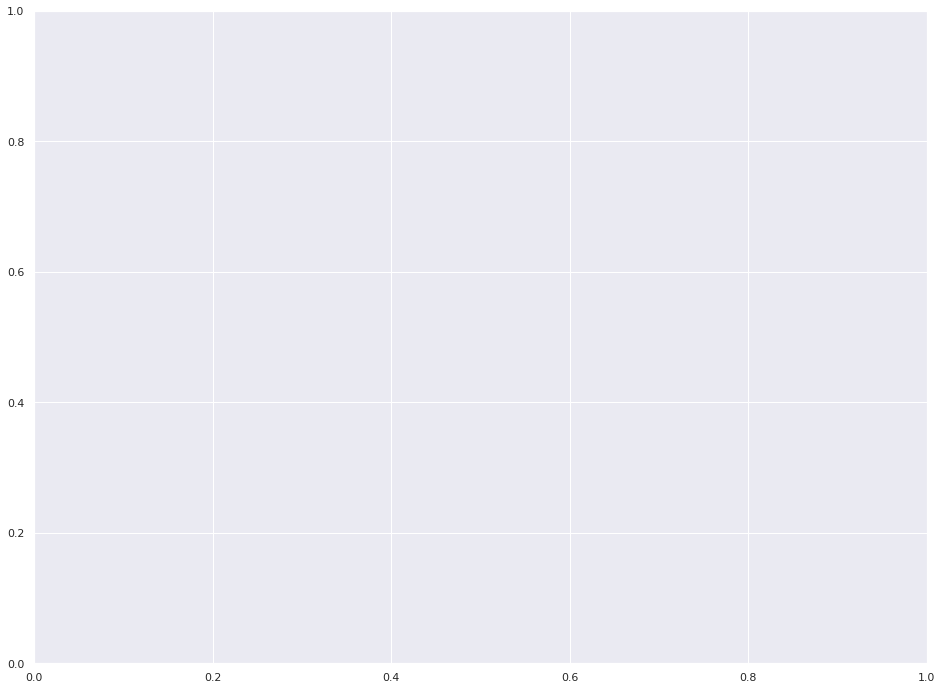

In [15]:
I0 = ydata[0]
S0 = 1000000
R0 = 0
beta
​
In [92]:
￼
fig, ax1 = plt.subplots(1,1)

In [16]:
print(I0)

46


In [17]:
def SIR_model(SIR, time, beta, gamma):
    
    S,I,R = SIR
    dS = -beta * S * I/N0
    dI = beta * S * I/N0 - gamma * I
    dR = gamma * I
    
    return([dS, dI, dR])
    

In [18]:
def fit_odeint(x,beta,gamma):
    return integrate.odeint(SIR_model, (S0,I0,R0), time, args=(beta, gamma))[:,1]

# [,:1] infected rate

In [19]:
# Integrate

popt = [beta, gamma]  #beta, gamma

fit_odeint(time, *popt)

array([4.60000000e+01, 6.20932521e+01, 8.38159426e+01, 1.13136567e+02,
       1.52711391e+02, 2.06124295e+02, 2.78209852e+02, 3.75488257e+02,
       5.06750209e+02, 6.83842454e+02, 9.22720880e+02, 1.24485887e+03,
       1.67912444e+03, 2.26427076e+03, 3.05221982e+03, 4.11235383e+03,
       5.53705555e+03, 7.44873678e+03, 1.00085304e+04, 1.34266328e+04,
       1.79738697e+04, 2.39932696e+04, 3.19090658e+04, 4.22284342e+04,
       5.55283985e+04, 7.24172565e+04, 9.34582685e+04, 1.19046564e+05,
       1.49242825e+05, 1.83592088e+05, 2.20987642e+05, 2.59659464e+05,
       2.97347059e+05, 3.31646938e+05, 3.60436146e+05, 3.82226083e+05,
       3.96334161e+05, 4.02850127e+05, 4.02456224e+05, 3.96192099e+05,
       3.85238773e+05, 3.70759449e+05, 3.53803270e+05, 3.35260662e+05,
       3.15853751e+05, 2.96147072e+05, 2.76567842e+05, 2.57429083e+05,
       2.38951898e+05, 2.21285163e+05, 2.04522091e+05, 1.88713715e+05,
       1.73879614e+05, 1.60016329e+05, 1.47103878e+05, 1.35110749e+05,
      

In [20]:
popt, pcov = optimize.curve_fit(fit_odeint, time, ydata)
perr = np.sqrt(np.diag(pcov))


/usr/local/lib/python3.6/site-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



In [21]:
print('Standard deviation errors : ', str(perr), 'Infection Start : ', ydata[0])


Standard deviation errors :  [0.00650799 0.00573184] Infection Start :  46


In [22]:
fitted = fit_odeint(time, *popt)

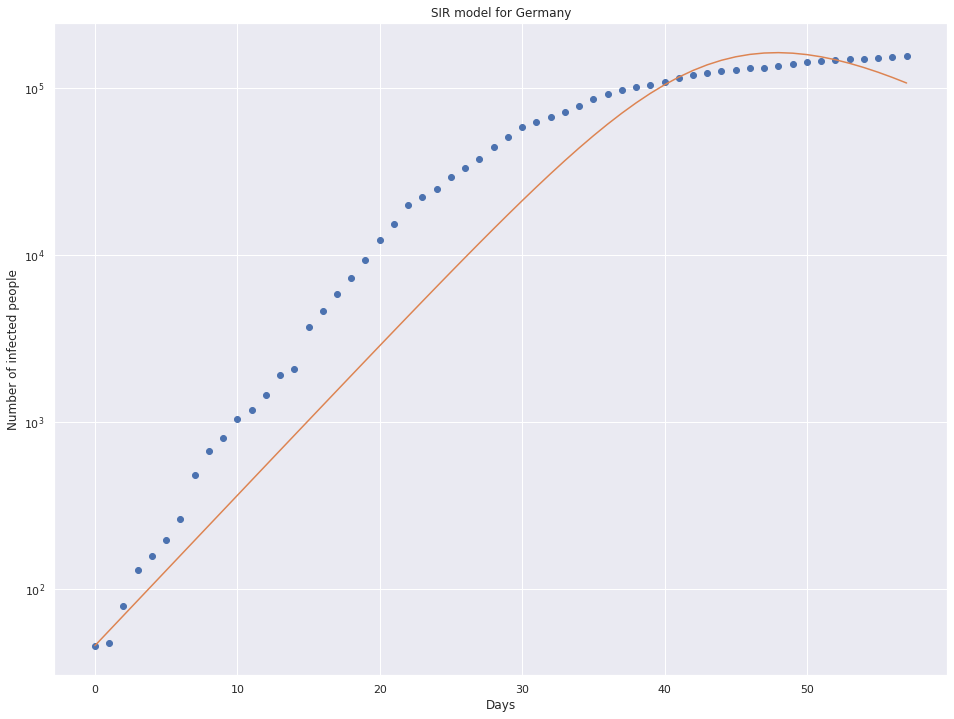

Optimal Parameters : beta =  0.40452627385523154 gamma =  0.19757508611221122
Reproduction number, R0 :  2.047455890392395


In [23]:
plt.semilogy(time, ydata, 'o')
plt.semilogy(time, fitted)
plt.title('SIR model for Germany')
plt.ylabel('Number of infected people')
plt.xlabel('Days')
plt.show()

print('Optimal Parameters : beta = ', popt[0], 'gamma = ', popt[1])
print('Reproduction number, R0 : ', popt[0]/popt[1])

## Dynamic Beta 

In [27]:
t_initial = 22
t_intro_measures = 16
t_hold = 21
t_relax = 21

beta_max = 0.4
beta_min = 0.11
gamma = 0.1


pd_beta = np.concatenate((np.array(t_initial*[beta_max]),
                          np.linspace(beta_max, beta_min, t_intro_measures),
                          np.array(t_hold * [beta_min]),
                          np.linspace(beta_min, beta_max, t_relax)
                        ))

pd_beta

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.38066667, 0.36133333,
       0.342     , 0.32266667, 0.30333333, 0.284     , 0.26466667,
       0.24533333, 0.226     , 0.20666667, 0.18733333, 0.168     ,
       0.14866667, 0.12933333, 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.1245    , 0.139     , 0.1535    , 0.168     , 0.1825    ,
       0.197     , 0.2115    , 0.226     , 0.2405    , 0.255     ,
       0.2695    , 0.284     , 0.2985    , 0.313     , 0.3275 

In [28]:
SIR = np.array([S0,I0,R0])

propagation_rates = pd.DataFrame(columns={'Susceptible':S0,
                                          'Infected':I0,
                                          'Recovered':R0                                                  
                                         })
                                 
for each_beta in pd_beta:
    new_delta_vector = SIR_model(SIR, time, each_beta, gamma)
    SIR = SIR + new_delta_vector
    
    propagation_rates = propagation_rates.append({'Susceptible':SIR[0],
                                                  'Infected':SIR[1],
                                                  'Recovered':SIR[2],                         
                                                },ignore_index=True
                                                )
                                 



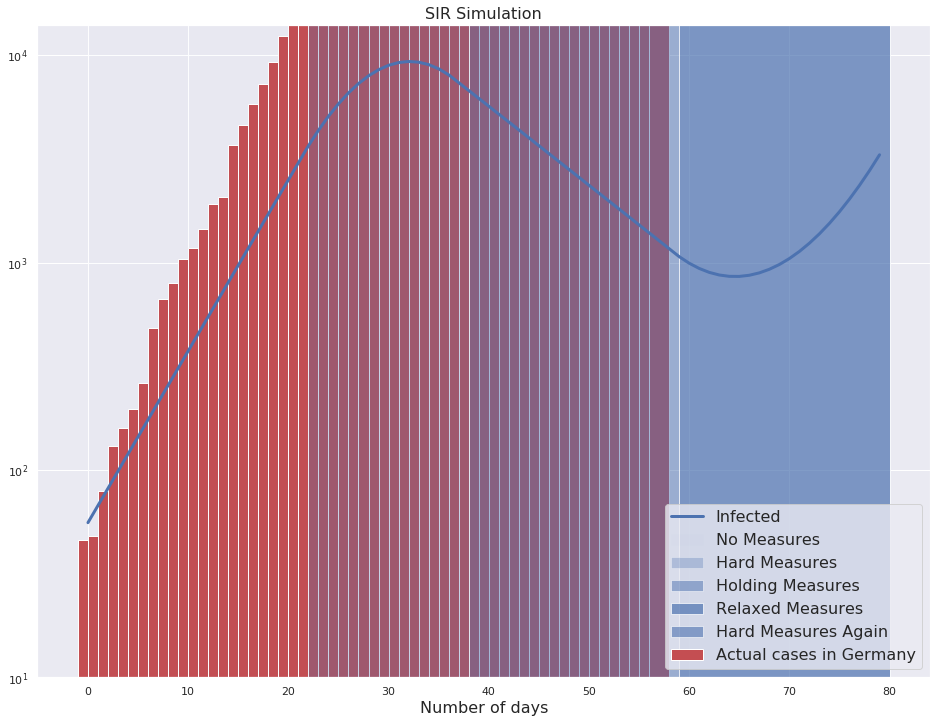

In [29]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index, propagation_rates.Infected, label = 'Infected', linewidth = 3)

ax1.bar(np.arange(len(ydata)), ydata, width=2, label = 'Actual cases in Germany', color = 'r')
t_phases = np.array([t_initial, t_intro_measures, t_hold, t_relax]).cumsum()

ax1.axvspan(0, t_phases[0], facecolor='b', alpha=0.01, label="No Measures")
ax1.axvspan(t_phases[0], t_phases[1], facecolor='b', alpha=0.3, label="Hard Measures")
ax1.axvspan(t_phases[1], t_phases[2], facecolor='b', alpha=0.5, label="Holding Measures")
ax1.axvspan(t_phases[2], t_phases[3], facecolor='b', alpha=0.7, label="Relaxed Measures")
ax1.axvspan(t_phases[3], len(propagation_rates.Infected),facecolor='b', alpha=0.6, label="Hard Measures Again")

ax1.set_ylim(10,1.5*max(propagation_rates.Infected))
#ax1.set_xlim(0,100)
ax1.set_yscale('log')
ax1.set_title('SIR Simulation', size= 16)
ax1.set_xlabel('Number of days', size=16)
ax1.legend(loc='best',
          prop={'size':16})